In [2]:
#Libraries
import pandas as pd
import numpy as np
import bnlearn as bn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from math import log

In [7]:
df = pd.read_csv(r'C:\Users\jorda\Desktop\Dissertation\Dissertation Code\data_cleaned_and_Explored.csv')
df.head()

,Unnamed: 0,year,manufacturer,model,description,euro_standard,engine_capacity,urban_metric,extra_urban_metric,co2,co,fuel_12k_miles,transmission,fueltype,c_o
0,0,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,1600,11.1,6.5,195,980,1236,0,0,6.887553
1,1,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,1700,11.5,6.6,200,1105,1266,0,0,7.007601
2,2,2000,Alfa Romeo,145 Range,Cloverleaf,2,2000,12.4,6.6,210,1103,1326,0,0,7.005789
3,3,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,1600,11.3,6.6,195,980,1252,0,0,6.887553
4,4,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,1700,11.5,6.6,200,1105,1266,0,0,7.007601


In [8]:
df = df.drop(columns = {'Unnamed: 0', 'manufacturer', 'model', 'description', 'extra_urban_metric', 'c_o'})

In [12]:
df.head(40001)

,year,euro_standard,engine_capacity,urban_metric,co2,co,fuel_12k_miles,transmission,fueltype
0,2000,2,1600,11.1,195,980,1236,0,0
1,2000,2,1700,11.5,200,1105,1266,0,0
2,2000,2,2000,12.4,210,1103,1326,0,0
3,2000,2,1600,11.3,195,980,1252,0,0
4,2000,2,1700,11.5,200,1105,1266,0,0
...,...,...,...,...,...,...,...,...,...
39996,2012,5,1700,5.6,121,140,1306,0,1
39997,2012,5,1700,5.5,119,140,1276,0,1
39998,2012,5,1700,5.6,121,140,1306,0,1
39999,2012,5,1700,5.5,119,140,1276,0,1


In [4]:
#Hybrid (mix)

#Discrete
df['fuel_12k_miles'] = df['fuel_12k_miles'].apply(lambda x: 'Below 1376' if 0<=x<=1376 else 'Above 1376')

df['urban_metric'] = df['urban_metric'].apply(lambda x: '0-9.8' if 0<=x<=9.8 else '9.8+')

df['year'] = df['year'].apply(lambda x: '2000-2008' if 2000<=x<=2008 else '2008-2013')

df['euro_standard'] = df['euro_standard'].apply(lambda x: '2-4' if 2<=x<=4 else '5-6')

#Continuous
df['co'] = df['co'].apply(lambda x: '0-25%' if 0<=x<=189 else
                          '25-50%' if 190<=x<=302 else
                          '50-75%' if 303<=x<=380 else '75-100%')

df['co2'] = df['co2'].apply(lambda x: '0-25%' if 0<=x<=150 else
                            '25-50%' if 151<=x<=180 else
                            '50-75%' if 181<x<218 else '75-100%')

df['engine_capacity'] = df['engine_capacity'].apply(lambda x: 'Low' if 0<=x<=1400 else
                                                    'Medium' if 1500<=x<=2400 else 'High')


In [5]:
df.head(3000)

,Unnamed: 0,year,euro_standard,engine_capacity,urban_metric,co2,co,fuel_12k_miles,transmission,fueltype
0,0,2000-2008,2-4,Medium,9.8+,50-75%,75-100%,Below 1376,0,0
1,1,2000-2008,2-4,Medium,9.8+,50-75%,75-100%,Below 1376,0,0
2,2,2000-2008,2-4,Medium,9.8+,50-75%,75-100%,Below 1376,0,0
3,3,2000-2008,2-4,Medium,9.8+,50-75%,75-100%,Below 1376,0,0
4,4,2000-2008,2-4,Medium,9.8+,50-75%,75-100%,Below 1376,0,0
...,...,...,...,...,...,...,...,...,...,...
2995,2995,2000-2008,2-4,Medium,9.8+,50-75%,50-75%,Below 1376,0,0
2996,2996,2000-2008,2-4,Medium,9.8+,50-75%,75-100%,Below 1376,0,0
2997,2997,2000-2008,2-4,Medium,9.8+,50-75%,75-100%,Below 1376,0,0
2998,2998,2000-2008,2-4,Medium,0-9.8,0-25%,25-50%,Below 1376,0,1


In [6]:
dfhot, dfnum = bn.df2onehot(df)

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]


[df2onehot] >Auto detecting dtypes.


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 76.95it/s]

[df2onehot] >Set dtypes in dataframe..
[df2onehot] >Total onehot features: 26


Building tree: 100%|███████████████████████████████████████████████████████████████| 36/36.0 [00:00<00:00, 1544.22it/s]


[bnlearn] >Computing best DAG using [cl]
[bnlearn] >Plot based on BayesianModel


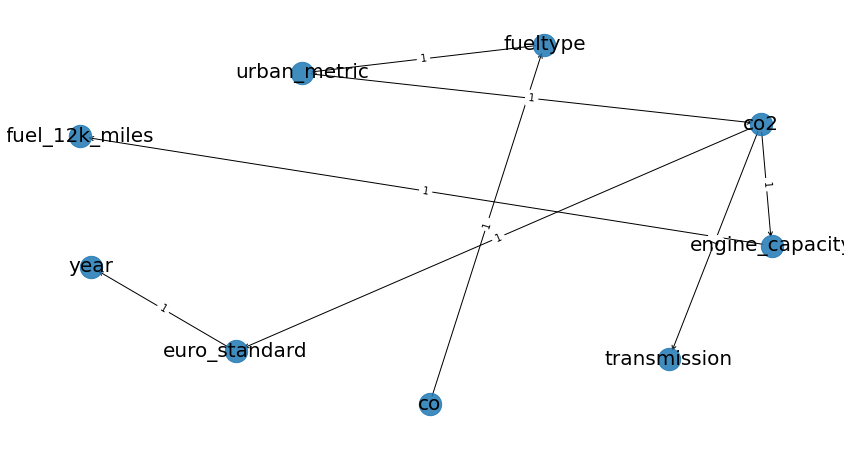

In [7]:
DAG = bn.structure_learning.fit(dfnum, methodtype='cl', root_node='co')
# Plot
G = bn.plot(DAG)

In [8]:
model = bn.parameter_learning.fit(DAG, dfnum)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.
[bnlearn] >CPD of co:
+-------+----------+
| co(1) | 0.251253 |
+-------+----------+
| co(2) | 0.249042 |
+-------+----------+
| co(3) | 0.128177 |
+-------+----------+
| co(4) | 0.371527 |
+-------+----------+
[bnlearn] >CPD of fueltype:
+-------------+----------------------+-----------------------+----------------------+----------------------+
| co          | co(1)                | co(2)                 | co(3)                | co(4)                |
+-------------+----------------------+-----------------------+----------------------+----------------------+
| fueltype(1) | 0.21146641108303563  | 0.5190752461322081    | 0.6777113578138343   | 0.9000648164515939   |
+-------------+----------------------+-----------------------+----------------------+----------------------+
| fueltype(2) | 0.7682321164067265   | 0.459915611814346     | 0.2959863364645602   | 0.088386070355

In [9]:
query = bn.inference.fit(model, variables=['transmission'], evidence={'co2': True})
print(query)
print(query.df)

Eliminating: year: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 1764.22it/s]

[bnlearn] >Variable Elimination..
+-----------------+---------------------+
| transmission    |   phi(transmission) |
+=================+=====================+
| transmission(0) |              0.7615 |
+-----------------+---------------------+
| transmission(1) |              0.2385 |
+-----------------+---------------------+
+-----------------+---------------------+
| transmission    |   phi(transmission) |
+=================+=====================+
| transmission(0) |              0.7615 |
+-----------------+---------------------+
| transmission(1) |              0.2385 |
+-----------------+---------------------+
   transmission         p
0             0  0.761527
1             1  0.238473


In [10]:
bn.print_CPD(model)

CPD of co:
+-------+----------+
| co(1) | 0.251253 |
+-------+----------+
| co(2) | 0.249042 |
+-------+----------+
| co(3) | 0.128177 |
+-------+----------+
| co(4) | 0.371527 |
+-------+----------+
CPD of fueltype:
+-------------+----------------------+-----------------------+----------------------+----------------------+
| co          | co(1)                | co(2)                 | co(3)                | co(4)                |
+-------------+----------------------+-----------------------+----------------------+----------------------+
| fueltype(1) | 0.21146641108303563  | 0.5190752461322081    | 0.6777113578138343   | 0.9000648164515939   |
+-------------+----------------------+-----------------------+----------------------+----------------------+
| fueltype(2) | 0.7682321164067265   | 0.459915611814346     | 0.2959863364645602   | 0.088386070355312    |
+-------------+----------------------+-----------------------+----------------------+----------------------+
| fueltype(3) | 0.01

In [19]:
Xtest = bn.sampling(model, n=1000)
Xtest = Xtest[['co2', 'engine_capacity']]
print(Xtest)

Generating for node: fuel_12k_miles: 100%|██████████████████████████████████████████████| 9/9 [00:00<00:00, 412.40it/s]

[bnlearn] >Forward sampling for 1000 samples..
     co2  co
0      1   2
1      2   3
2      4   1
3      3   4
4      3   2
..   ...  ..
995    3   2
996    3   1
997    4   2
998    4   1
999    2   2

[1000 rows x 2 columns]


In [20]:
Pred = bn.predict(model, Xtest, variables=['co2', 'engine_capacity'])
print(Pred)

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

[bnlearn]> Remaining columns for inference: 0


IndexError: index 15 is out of bounds for axis 0 with size 4

In [ ]:
MSE = metrics.mean_squared_error(Xtest, Pred)*100
print(MSE)

In [ ]:
n = len(Xtest)

In [ ]:
bic =  n * log(MSE) + 2 * log(n)    #2 is number of params of X 
bic